# mmdfabric
Detection of vertical weave in fabrics.

# Description

In this example, an enlarged image of a fabric (with backlight illumination) is processed. The purpose is getting a quantitative index of the fabric quality. For that, fabric spaces are detected and measured.


In [1]:
import numpy as np
from PIL import Image
import ia870 as ia
import matplotlib.pyplot as plt

# Reading

The gray scale image to be processed is read. 

(-0.5, 272.5, 199.5, -0.5)

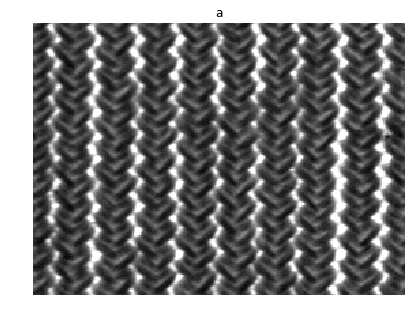

In [2]:
a_pil = Image.open('data/fabric.tif').convert('L')
a = np.array (a_pil)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('a')
axes.imshow(a, cmap='gray')
axes.axis('off')

# Enhancement of the white vertical stripes

A sequence of dilations (by a disk and two line segments) is applied to enhance the white stripes 

(-0.5, 272.5, 199.5, -0.5)

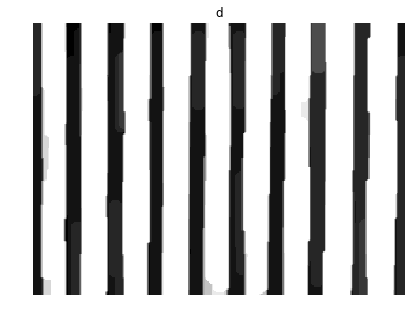

In [3]:
b = ia.iadil(a,ia.iasedisk(4));
c = ia.iadil(b,ia.iaseline(25,90));
d = ia.iadil(c,ia.iaseline(25,-90));

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('d')
axes.imshow(d, cmap='gray')
axes.axis('off')

# The markers are the dark regions

The markers are the regional minima with contrast 25. 

(-0.5, 272.5, 199.5, -0.5)

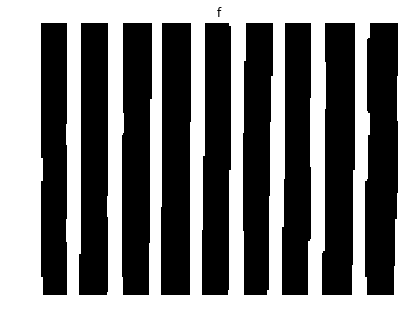

In [4]:
e = ia.iahmin(d,25);
f = ia.iaregmin(e);

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('f')
axes.imshow(f, cmap='gray')
axes.axis('off')

# Watershed lines detect the white stripes center

Watershed of the original image from the dark stripes markers just created. Show the result overlayed on the original image.  

(-0.5, 272.5, 199.5, -0.5)

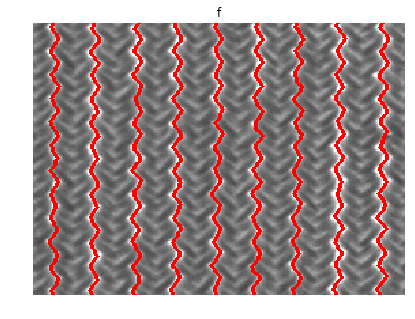

In [5]:
g = ia.iacwatershed(a,f)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('f')
axes.imshow(ia.iagshow (a, ia.iadil(g)).transpose(1, 2, 0))
axes.axis('off')

## Watershed lines detect the white stripes region

Create a new marker by taking the union of the dark markers and the watershed lines just created. The gradient of the original image is computed. 

(-0.5, 272.5, 199.5, -0.5)

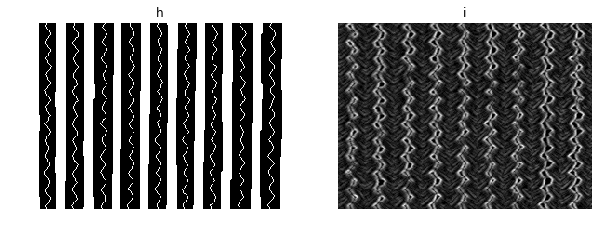

In [6]:
h = ia.iaunion(g,f);
i = ia.iagradm(a);

(fig, axes) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
axes[0].set_title('h')
axes[0].imshow(h, cmap='gray')
axes[0].axis('off')
axes[1].set_title('i')
axes[1].imshow(i, cmap='gray')
axes[1].axis('off')

# Final watershed lines

The watershed of the gradient of the original image, taking the marker just created, gives the extend of the white regions. 

(-0.5, 272.5, 199.5, -0.5)

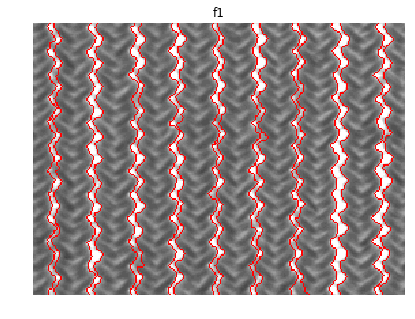

In [7]:
j = ia.iacwatershed(i,h,ia.iasebox());

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('f1')
axes.imshow(ia.iagshow(a, j).transpose(1, 2, 0))
axes.axis('off')

## Final watershed regions and area measurement

The watershed regions area computed. The area of each watershed regions is measured and displayed. 

(-0.5, 272.5, 199.5, -0.5)

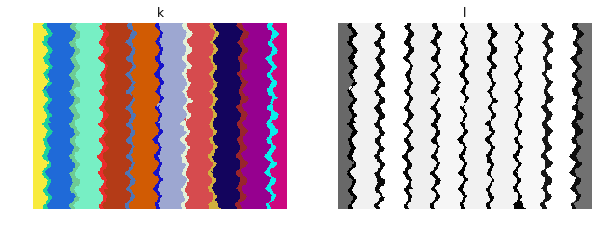

In [8]:
k = ia.iacwatershed(i,h,ia.iasebox(),'REGIONS');
l = ia.iablob(k,'area');

(fig, axes) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
axes[0].set_title('k')
axes[0].imshow(ia.iaglblshow(k, 'border').transpose(1, 2, 0))
axes[0].axis('off')
axes[1].set_title('l')
axes[1].imshow(l, cmap='gray')
axes[1].axis('off')

## Select only the narrow region (small area)

To select only the fabric spacing, select the regions with small area (less than 2000). Label the narrow regions. 

(-0.5, 272.5, 199.5, -0.5)

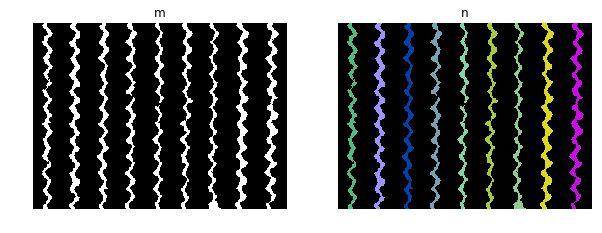

In [9]:
m = ia.iacmp(l,'<=',2000)
n = ia.ialabel(m,ia.iasebox())

(fig, axes) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
axes[0].set_title('m')
axes[0].imshow(m, cmap='gray')
axes[0].axis('off')
axes[1].set_title('n')
axes[1].imshow(ia.iaglblshow(n, 'border').transpose(1, 2, 0))
axes[1].axis('off')

## Area measurement and ploting

Compute the area of each region and plot them. Also display the original image for illustration. From the plot, we can notice that the two rightmost weave spacing are significantly larger than the others. 

<BarContainer object of 9 artists>

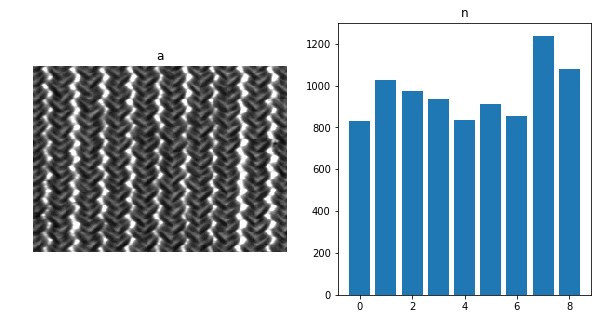

In [10]:
o = ia.iablob(n,'area','data')
ind = np.arange(9)
(fig, axes) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
axes[0].set_title('a')
axes[0].imshow(a, cmap='gray')
axes[0].axis('off')
axes[1].set_title('n')
axes[1].bar(ind, o)